In [ ]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Data read/write
import PyPDF2
import numpy as np
import pandas as pd
from PyPDF2 import PdfReader

# Data Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

Read pdf file by through PyPDF2 package

In [3]:

path = r"C:\\Users\\HP\\OneDrive\\Desktop\\Diagnosis\\2022, CURRENT Medical Diagnosis and Treatment- Original.pdf"
text_file = open( path ,"rb")
# open file and read it through PyPDF2 packages
reader = PdfReader(text_file)
total_page = len(reader.pages)
print(total_page)


1874


In [13]:
def extract_articles_from_pdf(reader, start_page, end_page):
    article_text = ""
    for page_num in range(start_page, end_page):
        pageObj = reader.pages[page_num]
        extract = pageObj.extract_text().split("\n")
        article_text += ' '.join(extract)
        list_from_pdf.append(extract)
    return article_text

list_from_pdf = []

# Extracting each article
article1 = extract_articles_from_pdf(reader, 1632, 1696)
article2 = extract_articles_from_pdf(reader, 1232, 1276)
article3 = extract_articles_from_pdf(reader, 998, 1074)
article4 = extract_articles_from_pdf(reader, 932, 972)
article5 = extract_articles_from_pdf(reader, 463, 522)
article6 = extract_articles_from_pdf(reader, 187, 221)

# Creating a DataFrame
articles = [article1, article2, article3, article4, article5, article6]
df = pd.DataFrame(articles, columns=['string_values'])


In [8]:
article= article1 + " " + article2 + " " + article3 + " " + article4  + " " +article5 + " " + article6 


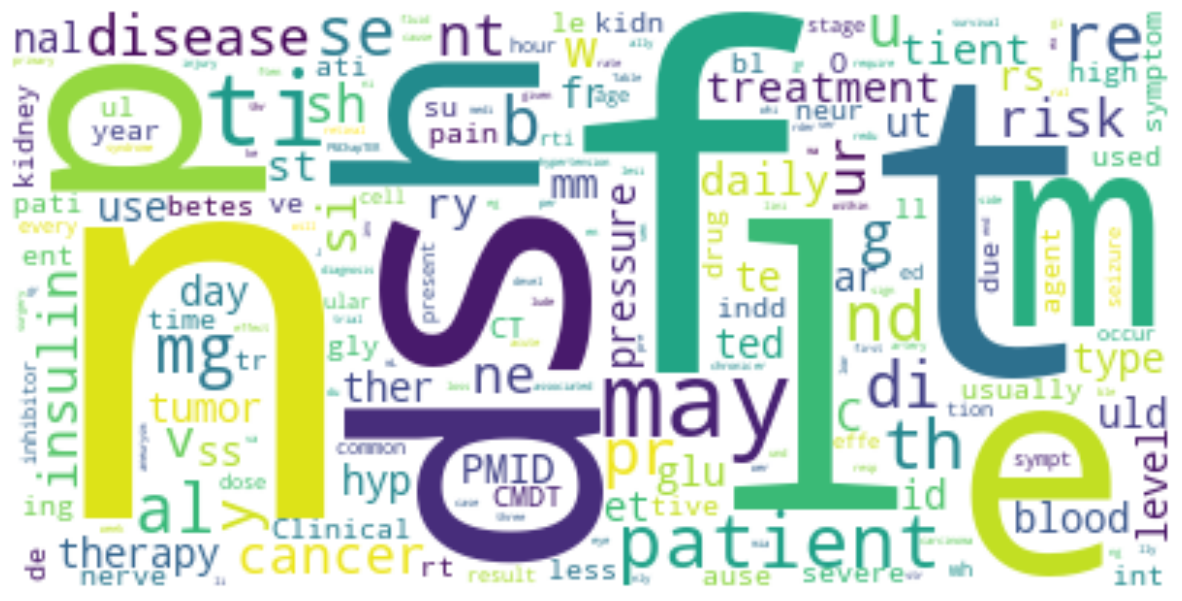

In [14]:

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(article)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
def get_freq_word(TEXT_list):
    """This method get count the frequency of each word in the passed parameter"""
    Vocab_list = ' '.join(TEXT_list)
    temp_dict = Counter(Vocab_list.split()).items()
    freq_df = pd.DataFrame(temp_dict)
    freq_df = freq_df.sort_values(1, ascending = False)
    return freq_df

c:\Users\HP\anaconda3\envs\diagnosis\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 57403 (\ue03b) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


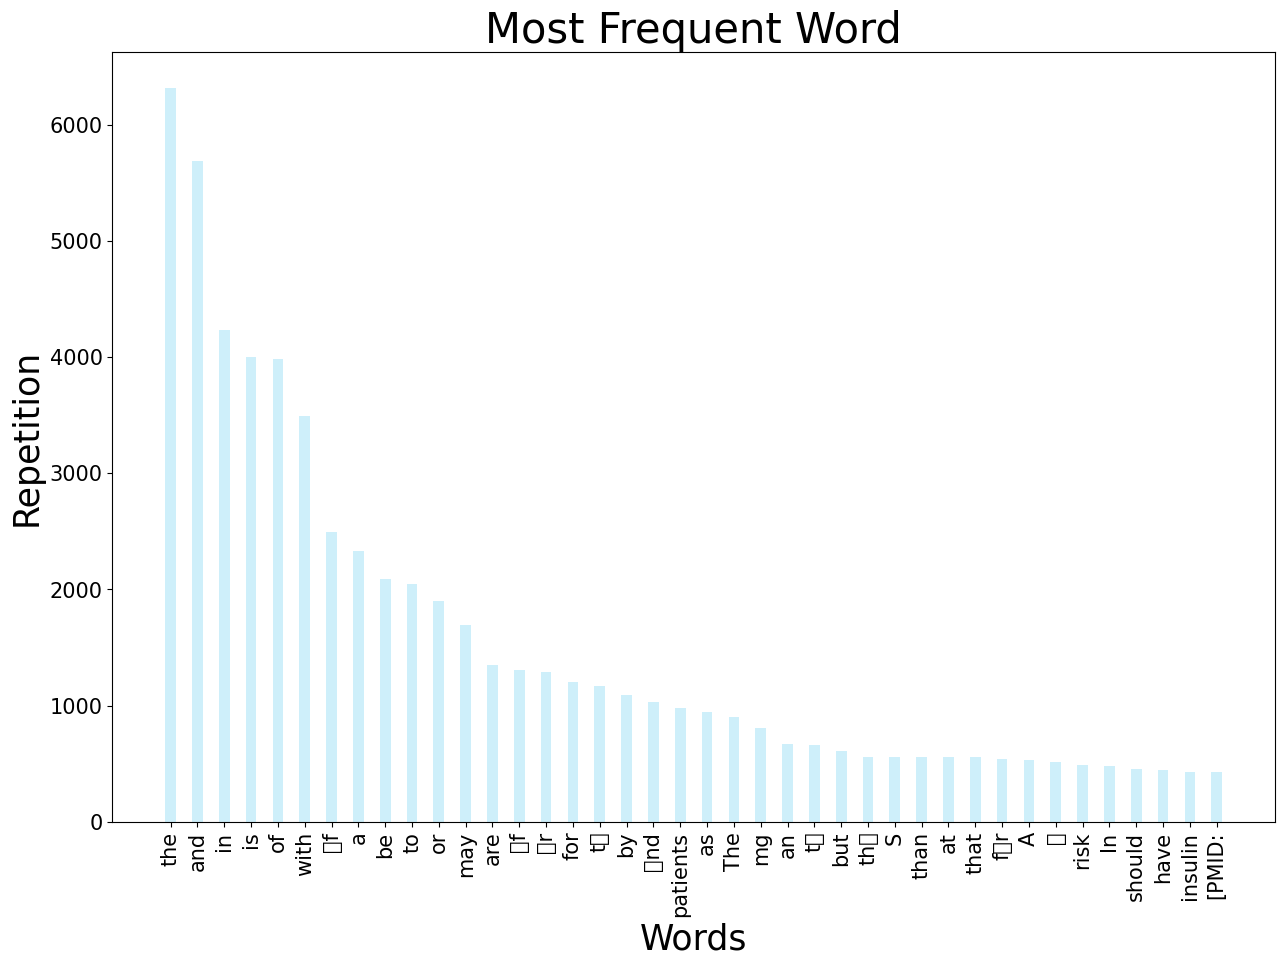

In [17]:

freq_words = get_freq_word(df.string_values)
freq_words.columns = ['WORD', 'COUNT']

plt.figure(figsize=(15,10))
plt.bar(freq_words.WORD[:40], freq_words.COUNT[:40], color ='#ceeffa',
        width = 0.4)
plt.xticks(rotation=90 ,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Words" , fontsize = 25)
plt.ylabel("Repetition", fontsize = 25)
plt.title("Most Frequent Word", fontsize = 30)
plt.show();

In [18]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [ ]:
import ssl
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
ssl._create_default_https_context = ssl._create_unverified_context

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Import WordNetLemmatizer, and stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# import spcay framework
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.symbols import amod
# Import Counter
from collections import Counter
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
df['spacy_doc'] = list(nlp.pipe(df.string_values))

In [73]:
# Create an empty list to store the processed docs
processed_docs = []

# Process each text and split long ones
for text in df['string_values']:
        processed_docs.append(nlp(text))



# Assign the processed docs back to the DataFrame


In [74]:
df['spacy_doc'] = processed_docs

In [75]:
df.head()

,string_values,spacy_doc
0,CANCER1613 CMDT 2022Office of Disease Prevent...,"(CANCER1613, CMDT, 2022Office, , of, Disease,..."
1,DIABETES MELLITUS & HYPOGLYCEMIA1213 CMDT 2022...,"(DIABETES, MELLITUS, &, HYPOGLYCEMIA1213, CMDT..."
2,NERVOUS SYSTEM DISORDERS979 CMDT 2022alhli...,"(NERVOUS, SYSTEM, DISORDERS979, CMDT, 2022al..."
3,KIDNEY DISEASE913 CMDT 2022Thr ar svral ...,"(KIDNEY, DISEASE913, CMDT, 2022Thr, , ar, ..."
4,Chapter 11444 CMDT 2022Elev ated BP reading (o...,"(Chapter, 11444, CMDT, 2022Elev, ated, BP, rea..."


In [84]:

doc_adj = [token.text.lower() for doc in df.spacy_doc for token in doc if token.pos_=='ADJ']
doc_noun = [token.text.lower() for doc in df.spacy_doc for token in doc if token.pos_=='NOUN']

In [88]:
Counter(doc_adj).most_common(500)

[('\ue040f', 282),
 ('high', 259),
 ('severe', 222),
 ('common', 200),
 ('less', 186),
 ('retinal', 184),
 ('such', 183),
 ('due', 183),
 ('other', 176),
 ('daily', 172),
 ('primary', 158),
 ('first', 153),
 ('present', 151),
 ('chronic', 146),
 ('-', 141),
 ('r\ue03bnal', 140),
 ('low', 135),
 ('visual', 130),
 ('small', 129),
 ('clinical', 128),
 ('peripheral', 116),
 ('renal', 104),
 ('initial', 103),
 ('greater', 100),
 ('higher', 98),
 ('most', 96),
 ('acute', 95),
 ('su\ue034h', 94),
 ('early', 91),
 ('urinary', 91),
 ('surgical', 87),
 ('lower', 87),
 ('similar', 86),
 ('advanced', 85),
 ('available', 81),
 ('multiple', 80),
 ('colorectal', 79),
 ('systemic', 79),
 ('many', 79),
 ('normal', 77),
 ('metastatic', 76),
 ('helpful', 76),
 ('oral', 74),
 ('gastric', 73),
 ('single', 73),
 ('large', 71),
 ('optic', 70),
 ('likely', 68),
 ('mild', 68),
 ('several', 68),
 ('long', 66),
 ('tubular', 66),
 ('upper', 65),
 ('arterial', 65),
 ('cardiovascular', 62),
 ('corneal', 61),
 ('imp

In [87]:
Counter(doc_noun).most_common(200)

[('patients', 1302),
 ('%', 1154),
 ('t\ue040', 1050),
 ('\ue040f', 999),
 ('disease', 653),
 ('risk', 576),
 ('treatment', 534),
 ('mg', 489),
 ('f\ue040r', 476),
 ('cancer', 446),
 ('insulin', 437),
 ('pmid', 426),
 ('therapy', 422),
 ('pressure', 372),
 ('blood', 337),
 ('p\ue03atients', 334),
 ('pain', 267),
 ('type', 261),
 ('patient', 223),
 ('years', 223),
 ('\ue048f', 209),
 ('g', 208),
 ('b\ue03b', 207),
 ('levels', 206),
 ('days', 198),
 ('nerve', 198),
 ('use', 195),
 ('age', 193),
 ('kidney', 191),
 ('\ue048r', 186),
 ('survival', 183),
 ('s', 178),
 ('day', 175),
 ('loss', 171),
 ('t', 170),
 ('hours', 170),
 ('stage', 169),
 ('surgery', 168),
 ('hypertension', 166),
 ('t\ue048', 166),
 ('pati\ue03bnts', 165),
 ('tumors', 164),
 ('artery', 163),
 ('diagnosis', 160),
 ('times', 158),
 ('\ue03and', 155),
 ('\ue040r', 151),
 ('tumor', 149),
 ('cell', 148),
 ('agents', 147),
 ('signs', 145),
 ('weeks', 144),
 ('»', 138),
 ('cancers', 136),
 ('dose', 136),
 ('inhibitors', 136),

In [57]:
adj_list = list(set(doc_adj))

In [43]:
print(len(adj_list))

5060


In [59]:
stop_words = ["patient", "may", "disease", "cause", "treatment", "also", "symptom", "usually", "sign",
                "diagnosis", "result", "pain", "include", "pressure", "lung", "pulmonary", "respiratory",
                "chest", "fluid", "complication", "change", "blood", "infection", "therapy", "prevent",
                "acute", "care", "child", "level", "air", "use", "severe", "help", "used", "exercise",
                "normal", "incidence", "pneumonia","tissue", "show", "chronic", "failure", "cast", "increased",
                "monitor", "hypoxemia", "produce", "edema", "increase", "space", "occurs", "cough", "alveolar", 
                "heart", "pathophysiology", "sputum", "provide", "decreased", "pneumothorax", "test", "special",
                "tube", "condition", "common", "surgery","secretion", "fibrosis", "disorder", "pa", "area", "form",
                "cell", "skin", "drainage", "tb", "year", "commonly", "check", "teach", "rest", "watch", "encourage", 
                "underlying", "consideration", "et", "early", "hour", "family", "need", "effusion", "body", "drug", "support", 
                "rate", "syndrome", "requires", "inflammation", "abg", "side", "infant", "however", "upper", "cor", "pulmonale",
                 "ventilator", "mechanical", "breath", "maintain" , "foot", "day", "bed", "parent", "especially", "fever", "culture",
                'system', 'within', 'factor', 'amount', 'death', 'movement', 'progress', 'volume', 'one', 'stage', 'report',
                'avoid', 'respiration', 'trauma', 'occur', 'atelectasis', 'hand', 'includes', 'weight', 'tendon', 'hypertension', 
                'le', 'time', 'lead', 'damage', 'causing', 'require', 'activity', 'injury', 'risk', 'mm', 'measure', 'examination',
                'nerve', 'stress', 'make', 'al', 'see', 'decrease', 'age', 'hg''case', 'month', 'coughing', 'develops', 'formation', 
                'without', 'site', 'every', 'reduce', 'relieve', 'effect','percussion', 'ordered', 'develop', 'affect', 'loss', 'flow',
                'lesion', 'technique', 'exposure', 'gas', 'finding', 'procedure', 'begin', 'wall', 'immediately', 'type', 'response', 
                'position', 'needed', 'administer', 'control', 'ass', 'increasing', 'although', 'tell', 'output', 'give', 'analysis',
                'history', 'often' ,'week', 'home', 'perform','function', 'typically', 'frequently', 'adult', 'indicate', 'administration',
                'explain', 'using', 'suggest', 'called', 'center', 'head', 'people', 'resulting', 'including', 'period', 'feature', 'case','pmid','tion','eg','pmchapter','med'
                   ]

In [60]:
new_stopwords = adj_list+stop_words

In [61]:
stpwrd = stopwords.words('english')

In [62]:
print(f' adjective words = {len(adj_list)}')
print(f' topic domain stop words = {len(stop_words)}')
print(f' marge adj_list & stop_words =  {len(new_stopwords)}')
print(f' english stop words = {len(stpwrd)}')

 adjective words = 5060
 topic domain stop words = 222
 marge adj_list & stop_words =  5282
 english stop words = 198


In [63]:
stpwrd.extend(new_stopwords)

print(f'after marge all of the stop words = {len(stpwrd)}')

after marge all of the stop words = 5480


In [65]:
wordnet_lemmatizer = WordNetLemmatizer()
def text_preprocessing(articles):
    tokens = word_tokenize(articles)                                            # Tokenize the article: tokens
    lower_tokens= [t.lower() for t in tokens]                                   # Convert the tokens into lowercase: lower_tokens
    alpha_only = [t for t in lower_tokens if t.isalpha()]                       # Retain alphabetic words: alpha_only
    no_stops = [t for t in alpha_only if t not in stopwords.words('english')]   # Remove all stop words: no_stops
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]           # Lemmatize all tokens into a new list: lemmatized
    no_stops = [t for t in lemmatized if t not in stpwrd ]                     # Remove all stop words: no_stops
    return no_stops


In [66]:
bow1 = text_preprocessing(article1)
bow2 = text_preprocessing(article2)
bow3 = text_preprocessing(article3)
bow4 = text_preprocessing(article4)
bow5 = text_preprocessing(article5)
bow6 = text_preprocessing(article6)

In [68]:
print(Counter(bow2))

Counter({'kidney': 74, 'study': 71, 'given': 49, 'three': 38, 'unit': 37, 'benefit': 35, 'diabetes': 34, 'glucose': 34, 'dka': 32, 'g': 29, 'b': 25, 'pen': 25, 'egfr': 24, 'per': 23, 'either': 22, 'diet': 22, 'pmdiabetes': 21, 'required': 20, 'ldl': 20, 'nph': 20, 'islet': 19, 'mody': 19, 'united': 19, 'event': 19, 'even': 18, 'gene': 16, 'urine': 16, 'plasma': 16, 'whether': 14, 'hypoglycemia': 14, 'lin': 13, 'n': 12, 'inhibitor': 11, 'l': 11, 'cholesterol': 11, 'illness': 10, 'hg': 10, 'laboratory': 10, 'receptor': 10, 'two': 10, 'meal': 10, 'metformin': 10, 'mcg': 10, 'lipid': 9, 'medication': 9, 'ace': 9, 'e': 9, 'size': 9, 'dispensed': 9, 'agent': 9, 'despite': 8, 'action': 8, 'hdl': 8, 'dos': 8, 'unless': 8, 'prefilled': 8, 'infused': 8, 'nordisk': 8, 'vessel': 8, 'shift': 8, 'degree': 7, 'binding': 7, 'thus': 7, 'designed': 7, 'v': 7, 'seen': 7, 'fiber': 7, 'index': 7, 'state': 7, 'subcutaneously': 7, 'delivers': 7, 'lysine': 7, 'lispro': 7, 'novo': 7, 'mix': 7, 'needle': 7, 'in

In [55]:
corpus1 = " ".join(no_stops01)
corpus2 = " ".join(no_stops02)
corpus3 = " ".join(no_stops03)
corpus4 = " ".join(no_stops04)
corpus5 = " ".join(no_stops05)
corpus6 = " ".join(no_stops06)

df01 = pd.DataFrame([corpus1], columns=['string_values'])
new_row1 = pd.DataFrame({'string_values':[corpus2]})
new_row2 = pd.DataFrame({'string_values':[corpus3]})
new_row3 = pd.DataFrame({'string_values':[corpus4]})
new_row4 = pd.DataFrame({'string_values':[corpus5]})
new_row5 = pd.DataFrame({'string_values':[corpus6]})

df01 = pd.concat([df01, new_row1], ignore_index=True)
df01 = pd.concat([df01, new_row2], ignore_index=True)
df01 = pd.concat([df01, new_row3], ignore_index=True)
df01 = pd.concat([df01, new_row4], ignore_index=True)
df01 = pd.concat([df01, new_row5], ignore_index=True)

In [56]:
df = pd.DataFrame([article1], columns=['string_values'])  
new_row1 = pd.DataFrame({'string_values':[article2]})
new_row2 = pd.DataFrame({'string_values':[article3]})
new_row3 = pd.DataFrame({'string_values':[article4]})
new_row4 = pd.DataFrame({'string_values':[article5]})
new_row5 = pd.DataFrame({'string_values':[article6]})

df = pd.concat([df, new_row1], ignore_index=True)
df = pd.concat([df, new_row2], ignore_index=True)
df = pd.concat([df, new_row3], ignore_index=True)
df = pd.concat([df, new_row4], ignore_index=True)
df = pd.concat([df, new_row5], ignore_index=True)


In [58]:
df01.head()

,string_values
0,prevention health promotion tobacco tobacco ht...
1,diabetes life islet west diabetes mellitust yp...
2,beverage brainstem aura blindness field thria ...
3,kidney proteinuria found overload proteinuria ...
4,chapter ated bp reading office pharmacy coat o...


In [59]:
df01.to_csv('Current Medical Diagnosis1.csv', index=False)

In [60]:
import pickle
with open('Current medical diagnosis1.ob', 'wb') as fp:
    pickle.dump(stpwrd, fp)